/Users/benjaminliu/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/benjaminliu/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/benjaminliu/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/benjam

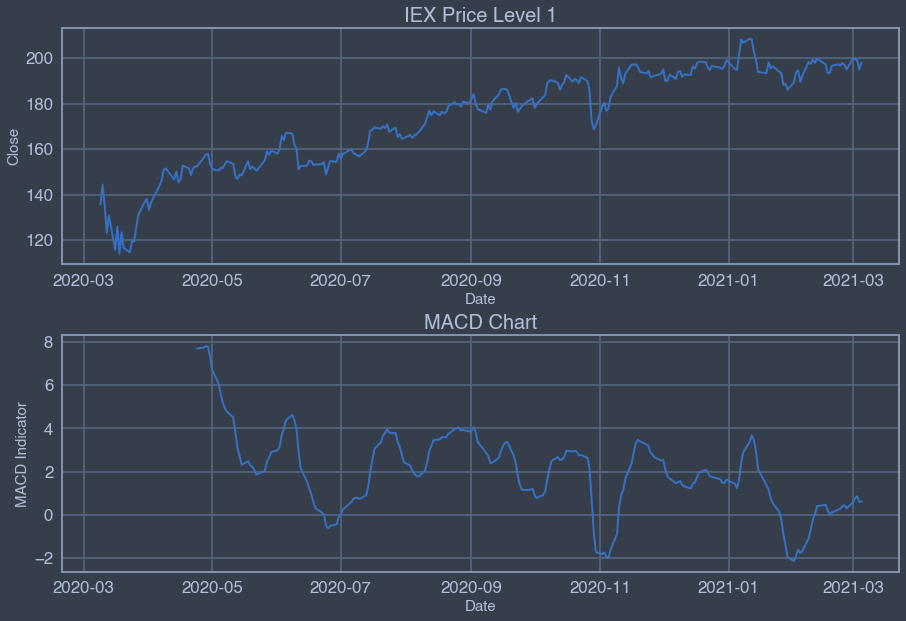

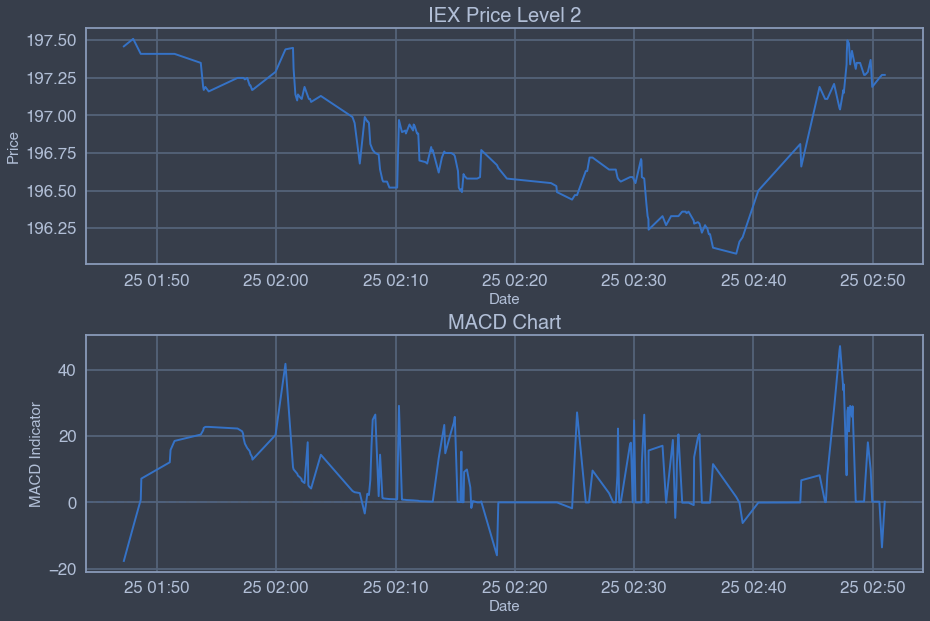

In [8]:
import pyEX as p
import pandas as pd
import seaborn as sns
import talib as t #talib provides all kinds of tools for technical indicators
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from jupyterthemes import jtplot

numbers = pd.read_pickle('numbers') #numbers is the name of the file containing the data
df = numbers.copy()

df['macd'], df['macdSignal'], df['macdHist'] = t.MACD(df['close'].values.astype(float),fastperiod=12, slowperiod=26, signalperiod = 9)

fig=plt.figure(figsize=(15,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=1, wspace=.2, hspace=.3)
ax0=fig.add_subplot(gs[0,0])
ax=sns.lineplot(x='date',y='close',data=df,ax=ax0)
ax.set_title('IEX Price Level 1',fontsize=20)
plt.ylabel("Close", fontsize=15)
plt.xlabel("Date", fontsize=15)
ax1=fig.add_subplot(gs[1,0],sharex=ax0)
ax=sns.lineplot(x='date',y='macd',data=df,ax=ax1)
ax.set_title('MACD Chart',fontsize=20)
plt.axhline(0, linestyle='--', alpha=0.1)
plt.ylabel("MACD Indicator", fontsize=15)
plt.xlabel("Date", fontsize=15)

L2=pd.read_csv('processedlevel2data.csv')
L2.dropna(subset=['bidtimestamp', 'asktimestamp'],thresh=1,inplace=True)
L2.sort_values(by=['bidtimestamp','asktimestamp'],inplace=True)
L2['bidmacd'], L2['bidmacdSignal'], L2['bidmacdHist'] = t.MACD(L2['bidprice'].values.astype(float), fastperiod=12, slowperiod=26, signalperiod = 9)
L2['askmacd'], L2['askmacdSignal'], L2['askmacdHist'] = t.MACD(L2['askprice'].values.astype(float), fastperiod=12, slowperiod=26, signalperiod = 9)
bid=L2[['bidprice','bidtimestamp','bidmacd']]
ask=L2[['askprice','asktimestamp','askmacd']]
ask.dropna(inplace=True)
bid.dropna(inplace=True)
ask.sort_values(by=['asktimestamp'],inplace=True)
bid.sort_values(by=['bidtimestamp'],inplace=True)
bid['bidtimestamp']=pd.to_datetime(bid['bidtimestamp'])
ask['asktimestamp']=pd.to_datetime(ask['asktimestamp'])

jtplot.style(theme='onedork',context='talk',fscale=1.6)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
               Line2D([0], [0], color='red', lw=4)]
fig=plt.figure(figsize=(15,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=1, wspace=.2, hspace=.3)
ax0=fig.add_subplot(gs[0,0])
ax=sns.lineplot(x='asktimestamp',y='askprice',data=ask,ax=ax0,color='b')
ax.set_title('IEX Price Level 2',fontsize=20)
plt.ylabel("Price", fontsize=15)
plt.xlabel("Date", fontsize=15)
ax1=fig.add_subplot(gs[1,0],sharex=ax0)
ax=sns.lineplot(x='asktimestamp',y='askmacd',ci=None,data=ask,ax=ax1,color='b')
ax.set_title('MACD Chart',fontsize=20)
plt.axhline(0, linestyle='--', alpha=0.1)
plt.ylabel("MACD Indicator", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.savefig('/Users/benjaminliu/Desktop/359images/level2.png', bbox_inches='tight')